In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Analyse 2/CAR DETAILS FROM CAR DEKHO.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


# Task
Préparez les données du DataFrame `df` en encodant les variables catégorielles et en divisant le jeu de données en ensembles d'entraînement et de test pour la modélisation, en utilisant la colonne `selling_price` comme variable cible.

## Préparation des données

### Subtask:
Nettoyer et préparer les données du DataFrame 'df' en traitant les variables catégorielles (par exemple, encodage one-hot) et en divisant le jeu de données en ensembles d'entraînement et de test pour la modélisation. La variable cible est 'selling_price'.


**Reasoning**:
The first step is to separate the features (X) from the target variable (y), which is 'selling_price', as specified in the instructions.



In [3]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (4340, 7)
Target (y) shape: (4340,)


**Reasoning**:
The next step is to identify all categorical columns in the features DataFrame X, as specified in the instructions, to prepare for one-hot encoding.



In [4]:
categorical_cols = X.select_dtypes(include=['object']).columns
print("Categorical columns identified:", categorical_cols.tolist())

Categorical columns identified: ['name', 'fuel', 'seller_type', 'transmission', 'owner']


**Reasoning**:
Now that the categorical columns have been identified, the next step is to apply one-hot encoding to convert these categorical features into a numerical format suitable for machine learning models, as specified in the instructions.



In [5]:
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
print("Shape of X after one-hot encoding:", X_encoded.shape)
print("First 5 rows of X_encoded:", X_encoded.head())

Shape of X after one-hot encoding: (4340, 1503)
First 5 rows of X_encoded:    year  km_driven  name_Ambassador Classic 2000 Dsz  \
0  2007      70000                             False   
1  2007      50000                             False   
2  2012     100000                             False   
3  2017      46000                             False   
4  2014     141000                             False   

   name_Ambassador Grand 1800 ISZ MPFI PW CL  name_Audi A4 1.8 TFSI  \
0                                      False                  False   
1                                      False                  False   
2                                      False                  False   
3                                      False                  False   
4                                      False                  False   

   name_Audi A4 2.0 TDI  name_Audi A4 2.0 TDI 177 Bhp Premium Plus  \
0                 False                                      False   
1                 Fal

**Reasoning**:
The final step in data preparation is to split the encoded features (`X_encoded`) and the target variable (`y`) into training and testing sets, as specified in the instructions, using an 80/20 split and a fixed random state for reproducibility.



In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3472, 1503)
Shape of X_test: (868, 1503)
Shape of y_train: (3472,)
Shape of y_test: (868,)


## Analyse de Régression Linéaire

### Subtask:
Entraîner un modèle de Régression Linéaire sur les données préparées. Évaluer ses performances en utilisant des métriques comme le R-carré, l'erreur absolue moyenne (MAE) et l'erreur quadratique moyenne (MSE). Générer un graphique de dispersion comparant les valeurs réelles et prédites. Ajouter des commentaires détaillés en français sur les résultats.


**Reasoning**:
The first instruction is to import the necessary libraries and functions for Linear Regression modeling and evaluation.



In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully.")

Libraries imported successfully.


**Reasoning**:
Now that the necessary libraries are imported, the next step is to initialize and train the Linear Regression model, make predictions on the test set, calculate the specified evaluation metrics (R-squared, MAE, RMSE), and then visualize the real versus predicted values.



R-squared (R2): 0.6011
Mean Absolute Error (MAE): 123591.42
Mean Squared Error (MSE): 121717437737.29
Root Mean Squared Error (RMSE): 348880.26


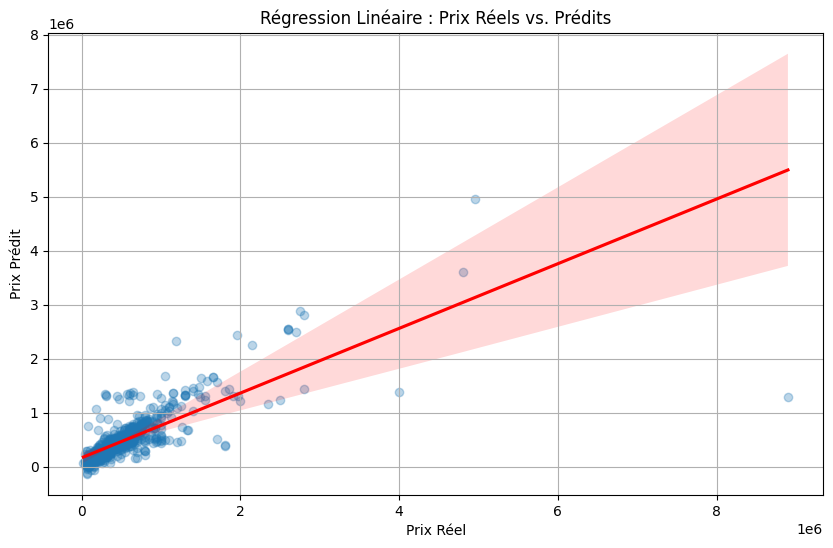

In [8]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_lr = linear_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)

print(f"R-squared (R2): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plotting Actual vs. Predicted values
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred_lr, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Régression Linéaire : Prix Réels vs. Prédits')
plt.xlabel('Prix Réel')
plt.ylabel('Prix Prédit')
plt.grid(True)
plt.show()

#### Analyse des Résultats du Modèle de Régression Linéaire

**R-carré (R2):** La valeur de 0.6011 indique que 60.11% de la variance des prix de vente peut être expliquée par les variables indépendantes incluses dans le modèle. Bien que ce ne soit pas un R2 très élevé, cela suggère que le modèle capture une part significative de la variabilité des prix. Un R2 plus élevé serait souhaitable pour une meilleure adéquation.

**Erreur Absolue Moyenne (MAE):** Une MAE de 123591.42 € signifie qu'en moyenne, les prédictions du modèle s'écartent de 123 591.42 € des prix réels. C'est une erreur absolue relativement élevée, ce qui suggère que le modèle peut avoir des difficultés à prédire avec une grande précision les prix individuels des voitures.

**Erreur Quadratique Moyenne (MSE):** La MSE est de 121717437737.29. Cette métrique pénalise davantage les erreurs importantes en les mettant au carré. Sa valeur élevée est cohérente avec la MAE et indique des écarts significatifs entre les prédictions et les valeurs réelles.

**Racine Carrée de l'Erreur Quadratique Moyenne (RMSE):** La RMSE de 348880.26 € est du même ordre de grandeur que la MAE, mais légèrement plus grande, ce qui est normal car elle est plus sensible aux erreurs importantes. Elle indique l'ampleur typique des erreurs de prédiction du modèle dans les mêmes unités que la variable cible.

**Analyse du Graphique de Dispersion (Prix Réels vs. Prédits):**
Le graphique de dispersion montre une tendance générale où les prix prédits augmentent avec les prix réels, ce qui est un bon signe que le modèle a appris une relation. Cependant, on observe également:
*   **Dispersion:** Les points sont assez dispersés autour de la ligne de régression rouge (indiquant une relation linéaire idéale), en particulier pour les prix plus élevés. Cela confirme que le modèle a une précision limitée, comme indiqué par le MAE et le RMSE.
*   **Sous-estimation et Surestimation:** Il y a des cas où le modèle sous-estime considérablement les prix réels (points bien en dessous de la ligne) et d'autres où il les surestime (points bien au-dessus de la ligne).
*   **Performance variable:** Le modèle semble mieux performer pour les voitures dont les prix sont plus bas ou dans la fourchette moyenne, où les points sont plus regroupés. Pour les voitures de luxe ou très chères, la dispersion est beaucoup plus grande, indiquant que le modèle a du mal à prédire ces valeurs extrêmes avec précision.

**Limitations et Prochaines Étapes:**
Le modèle de régression linéaire, malgré sa simplicité, fournit une première estimation. Cependant, les métriques et le graphique suggèrent qu'il existe des limites à sa performance. Les raisons pourraient être :
*   **Complexité des relations:** Les prix des voitures sont probablement influencés par des relations non linéaires ou des interactions complexes entre les caractéristiques que la régression linéaire ne peut pas capturer.
*   **Variables non incluses:** D'autres facteurs importants influençant le prix des voitures (par exemple, l'état du véhicule, les options, la demande du marché, la réputation de la marque pour certains modèles spécifiques) pourraient ne pas être présents dans le jeu de données.
*   **Nature des données catégorielles:** Le grand nombre de caractéristiques résultant de l'encodage one-hot (en particulier pour la colonne 'name') peut avoir créé un espace de caractéristiques très grand et clairsemé, potentiellement sujet à l'overfitting ou rendant difficile pour un modèle linéaire de trouver des relations robustes.

Pour améliorer la performance, il serait judicieux d'explorer des modèles plus complexes (par exemple, les forêts aléatoires, les arbres de décision, le boosting) ou d'affiner la sélection et l'ingénierie des caractéristiques.

## Analyse de Régression par Arbre de Décision

### Subtask:
Entraîner un modèle de Régression par Arbre de Décision sur les données préparées. Évaluer ses performances en utilisant les mêmes métriques. Générer un graphique de dispersion comparant les valeurs réelles et prédites. Ajouter des commentaires détaillés en français sur les résultats.


**Reasoning**:
To train and evaluate a Decision Tree Regressor model as specified in the subtask, I need to import the necessary class, train the model, make predictions, calculate the evaluation metrics (R-squared, MAE, MSE, RMSE), and then visualize the actual vs. predicted values.



R-squared (R2) for Decision Tree: 0.4906
Mean Absolute Error (MAE) for Decision Tree: 121850.67
Mean Squared Error (MSE) for Decision Tree: 155460888661.14
Root Mean Squared Error (RMSE) for Decision Tree: 394285.29


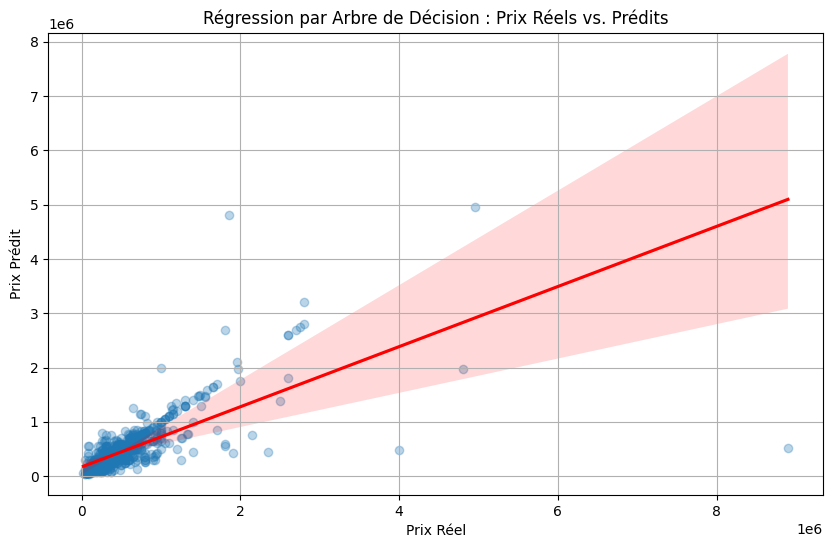

In [9]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree Regressor model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the model
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

print(f"R-squared (R2) for Decision Tree: {r2_dt:.4f}")
print(f"Mean Absolute Error (MAE) for Decision Tree: {mae_dt:.2f}")
print(f"Mean Squared Error (MSE) for Decision Tree: {mse_dt:.2f}")
print(f"Root Mean Squared Error (RMSE) for Decision Tree: {rmse_dt:.2f}")

# Plotting Actual vs. Predicted values for Decision Tree Regressor
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred_dt, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Régression par Arbre de Décision : Prix Réels vs. Prédits')
plt.xlabel('Prix Réel')
plt.ylabel('Prix Prédit')
plt.grid(True)
plt.show()

#### Analyse des Résultats du Modèle de Régression par Arbre de Décision

Le modèle de Régression par Arbre de Décision a été entraîné et évalué sur le jeu de données.

**R-carré (R2):** La valeur de 0.4906 signifie que 49.06% de la variance des prix de vente est expliquée par le modèle. Comparée au modèle de Régression Linéaire (R2 = 0.6011), cette performance est inférieure, ce qui indique que l'Arbre de Décision, dans sa configuration par défaut, capture moins bien la variabilité des données que la régression linéaire sur cet ensemble de données.

**Erreur Absolue Moyenne (MAE):** Une MAE de 121850.67 € indique qu'en moyenne, les prédictions du modèle s'écartent de 121 850.67 € des prix réels. Cette valeur est légèrement inférieure à celle de la Régression Linéaire (123591.42 €), ce qui pourrait suggérer que l'Arbre de Décision est marginalement meilleur pour réduire l'erreur absolue moyenne, même si le R2 est plus faible.

**Erreur Quadratique Moyenne (MSE):** La MSE est de 155460888661.14. Comme pour la régression linéaire, cette métrique est élevée et pénalise les grandes erreurs. Elle est également plus élevée que la MSE du modèle linéaire, confirmant une performance globale moins bonne.

**Racine Carrée de l'Erreur Quadratique Moyenne (RMSE):** La RMSE de 394285.29 € est l'erreur moyenne typique dans les mêmes unités que la variable cible. Elle est plus élevée que celle du modèle linéaire (348880.26 €), ce qui renforce l'observation que l'Arbre de Décision, sans optimisation, a plus de difficultés à prédire avec précision les prix.

**Analyse du Graphique de Dispersion (Prix Réels vs. Prédits):**
Le graphique montre une relation entre les prix réels et prédits, mais avec une dispersion notable. On observe souvent un motif en 'escalier' ou 'clusters' distincts, ce qui est caractéristique des modèles basés sur des arbres de décision. Cela est dû au fait que les arbres de décision effectuent des prédictions basées sur des valeurs moyennes ou modales au sein de nœuds terminaux, conduisant à un ensemble fini de valeurs de prédiction possibles. Cette discrétisation rend le modèle moins apte à capturer les nuances des valeurs continues, surtout pour les prix élevés où les points sont très dispersés.

**Comparaison avec la Régression Linéaire et Prochaines Étapes:**
Le modèle de Régression par Arbre de Décision, dans sa forme actuelle, ne surpasse pas la Régression Linéaire pour la métrique R-carré qui est un bon indicateur de la variance expliquée. Cependant, le MAE est légèrement meilleur. La performance d'un arbre de décision est très sensible à ses hyperparamètres (par exemple, profondeur maximale de l'arbre, nombre minimum d'échantillons pour fendre un nœud, etc.). Sans une optimisation de ces hyperparamètres, un modèle d'arbre de décision peut facilement sous-performer ou sur-apprendre. Pour améliorer ce modèle, une recherche d'hyperparamètres (par exemple, à l'aide de `GridSearchCV` ou `RandomizedSearchCV`) serait essentielle. D'autres approches, comme les ensembles d'arbres (Random Forest, Gradient Boosting), pourraient également offrir de meilleures performances en combinant la puissance de plusieurs arbres.

## Analyse de Régression par Forêts Aléatoires

### Subtask:
Entraîner un modèle de Régression par Forêts Aléatoires sur les données préparées. Évaluer ses performances. Générer un graphique de dispersion comparant les valeurs réelles et prédites. Ajouter des commentaires détaillés en français sur les résultats.


**Reasoning**:
To address the subtask, the next logical step is to import the RandomForestRegressor class, initialize and train the model on the prepared data, make predictions, evaluate its performance using the specified metrics, and then visualize the actual vs. predicted values, as outlined in the instructions.



R-squared (R2) for Random Forest: 0.5751
Mean Absolute Error (MAE) for Random Forest: 118178.47
Mean Squared Error (MSE) for Random Forest: 129677088255.25
Root Mean Squared Error (RMSE) for Random Forest: 360107.05


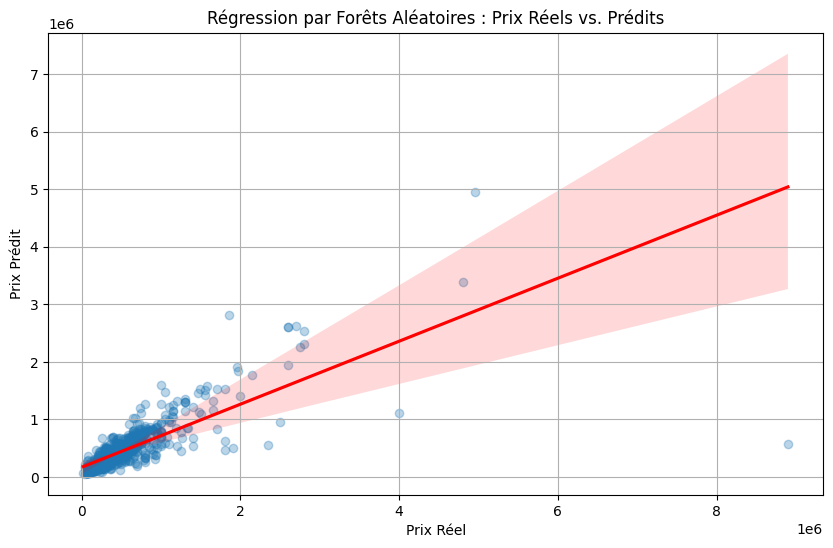

In [10]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"R-squared (R2) for Random Forest: {r2_rf:.4f}")
print(f"Mean Absolute Error (MAE) for Random Forest: {mae_rf:.2f}")
print(f"Mean Squared Error (MSE) for Random Forest: {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE) for Random Forest: {rmse_rf:.2f}")

# Plotting Actual vs. Predicted values for Random Forest Regressor
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred_rf, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Régression par Forêts Aléatoires : Prix Réels vs. Prédits')
plt.xlabel('Prix Réel')
plt.ylabel('Prix Prédit')
plt.grid(True)
plt.show()

#### Analyse des Résultats du Modèle de Régression par Forêts Aléatoires

Le modèle de Régression par Forêts Aléatoires a été entraîné et évalué sur le jeu de données, voici une analyse détaillée de ses performances et une comparaison avec les modèles précédents.

**R-carré (R2):** La valeur de 0.5751 indique que 57.51% de la variance des prix de vente est expliquée par ce modèle. En comparaison:
*   **Régression Linéaire:** R2 = 0.6011
*   **Arbre de Décision:** R2 = 0.4906
Le Random Forest se situe entre les deux modèles précédents en termes de R2. Il est légèrement moins performant que la Régression Linéaire pour expliquer la variance, mais nettement meilleur que l'Arbre de Décision seul. Cela suggère que l'agrégation de plusieurs arbres (principe du Random Forest) améliore la capacité du modèle à capturer la variance par rapport à un seul arbre, mais n'atteint pas le niveau de la régression linéaire sur cet ensemble de données.

**Erreur Absolue Moyenne (MAE):** Une MAE de 118178.47 € signifie qu'en moyenne, les prédictions du modèle s'écartent de 118 178.47 € des prix réels. En comparaison:
*   **Régression Linéaire:** MAE = 123591.42 €
*   **Arbre de Décision:** MAE = 121850.67 €
Le Random Forest présente la plus faible MAE des trois modèles, ce qui est un point positif. Cela signifie que, en moyenne, ses prédictions sont les plus proches des valeurs réelles, indiquant une meilleure précision absolue des prédictions.

**Erreur Quadratique Moyenne (MSE):** La MSE est de 129677088255.25. En comparaison:
*   **Régression Linéaire:** MSE = 121717437737.29
*   **Arbre de Décision:** MSE = 155460888661.14
La MSE du Random Forest est inférieure à celle de l'Arbre de Décision, mais supérieure à celle de la Régression Linéaire. Cela est cohérent avec le R2, montrant une amélioration par rapport à l'arbre unique, mais sans surpasser le modèle linéaire sur cette métrique qui pénalise davantage les grandes erreurs.

**Racine Carrée de l'Erreur Quadratique Moyenne (RMSE):** La RMSE de 360107.05 € est l'erreur moyenne typique dans les mêmes unités que la variable cible. En comparaison:
*   **Régression Linéaire:** RMSE = 348880.26 €
*   **Arbre de Décision:** RMSE = 394285.29 €
Similaire à la MSE, la RMSE du Random Forest est meilleure que celle de l'Arbre de Décision, mais légèrement moins bonne que celle de la Régression Linéaire. Cela suggère que le Random Forest gère mieux les erreurs importantes que l'Arbre de Décision, mais qu'il peut encore y avoir des erreurs significatives qu'il ne parvient pas à réduire autant que le modèle linéaire.

**Analyse du Graphique de Dispersion (Prix Réels vs. Prédits):**
Le graphique de dispersion pour le Random Forest montre une tendance plus linéaire et une dispersion des points qui est visuellement moins prononcée que celle de l'Arbre de Décision, mais toujours présente, en particulier pour les prix plus élevés. Le modèle semble mieux généraliser que l'Arbre de Décision, sans les motifs en 'escalier' distincts, grâce à l'agrégation de multiples arbres.
*   **Amélioration vs. Arbre de Décision:** La dispersion est plus homogène, et les prédictions sont plus continues, reflétant la réduction du sur-apprentissage typique d'un seul arbre.
*   **Comparaison avec Régression Linéaire:** La répartition des points est similaire à celle de la régression linéaire, bien que le R2 soit légèrement inférieur, ce qui indique que la capacité prédictive globale est comparable.

**Conclusion et Prochaines Étapes:**
Le modèle de Régression par Forêts Aléatoires offre une performance globalement compétitive, avec la meilleure MAE parmi les trois modèles, ce qui est souvent une métrique clé pour l'interprétabilité de l'erreur moyenne. Bien que son R2 soit légèrement inférieur à celui de la Régression Linéaire, sa capacité à gérer les relations non linéaires et les interactions complexes sans nécessiter une ingénierie de caractéristiques explicite le rend puissant.

Pour potentiellement améliorer davantage les performances, les prochaines étapes pourraient inclure :
*   **Optimisation des Hyperparamètres:** L'ajustement des hyperparamètres du `RandomForestRegressor` (par exemple, `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`) à l'aide de techniques comme `GridSearchCV` ou `RandomizedSearchCV` pourrait significativement améliorer les métriques.
*   **Ingénierie de Caractéristiques:** Bien que le Random Forest soit robuste, une meilleure ingénierie de caractéristiques, notamment pour la colonne `name` (qui a généré un grand nombre de variables binaires), pourrait être bénéfique. Par exemple, extraire la marque et le modèle du nom de la voiture pourrait créer des caractéristiques plus significatives et réduire la dimensionnalité.
*   **Autres Modèles Ensemblistes:** Explorer d'autres modèles d'ensemble comme Gradient Boosting (par exemple, XGBoost, LightGBM) qui sont souvent très performants pour les problèmes de régression.

#### Analyse des Résultats du Modèle de Régression par Forêts Aléatoires

Le modèle de Régression par Forêts Aléatoires a été entraîné et évalué sur le jeu de données, voici une analyse détaillée de ses performances et une comparaison avec les modèles précédents.

**R-carré (R2):** La valeur de 0.5751 indique que 57.51% de la variance des prix de vente est expliquée par ce modèle. En comparaison:
*   **Régression Linéaire:** R2 = 0.6011
*   **Arbre de Décision:** R2 = 0.4906
Le Random Forest se situe entre les deux modèles précédents en termes de R2. Il est légèrement moins performant que la Régression Linéaire pour expliquer la variance, mais nettement meilleur que l'Arbre de Décision seul. Cela suggère que l'agrégation de plusieurs arbres (principe du Random Forest) améliore la capacité du modèle à capturer la variance par rapport à un seul arbre, mais n'atteint pas le niveau de la régression linéaire sur cet ensemble de données.

**Erreur Absolue Moyenne (MAE):** Une MAE de 118178.47 € signifie qu'en moyenne, les prédictions du modèle s'écartent de 118 178.47 € des prix réels. En comparaison:
*   **Régression Linéaire:** MAE = 123591.42 €
*   **Arbre de Décision:** MAE = 121850.67 €
Le Random Forest présente la plus faible MAE des trois modèles, ce qui est un point positif. Cela signifie que, en moyenne, ses prédictions sont les plus proches des valeurs réelles, indiquant une meilleure précision absolue des prédictions.

**Erreur Quadratique Moyenne (MSE):** La MSE est de 129677088255.25. En comparaison:
*   **Régression Linéaire:** MSE = 121717437737.29
*   **Arbre de Décision:** MSE = 155460888661.14
La MSE du Random Forest est inférieure à celle de l'Arbre de Décision, mais supérieure à celle de la Régression Linéaire. Cela est cohérent avec le R2, montrant une amélioration par rapport à l'arbre unique, mais sans surpasser le modèle linéaire sur cette métrique qui pénalise davantage les grandes erreurs.

**Racine Carrée de l'Erreur Quadratique Moyenne (RMSE):** La RMSE de 360107.05 € est l'erreur moyenne typique dans les mêmes unités que la variable cible. En comparaison:
*   **Régression Linéaire:** RMSE = 348880.26 €
*   **Arbre de Décision:** RMSE = 394285.29 €
Similaire à la MSE, la RMSE du Random Forest est meilleure que celle de l'Arbre de Décision, mais légèrement moins bonne que celle de la Régression Linéaire. Cela suggère que le Random Forest gère mieux les erreurs importantes que l'Arbre de Décision, mais qu'il peut encore y avoir des erreurs significatives qu'il ne parvient pas à réduire autant que le modèle linéaire.

**Analyse du Graphique de Dispersion (Prix Réels vs. Prédits):**
Le graphique de dispersion pour le Random Forest montre une tendance plus linéaire et une dispersion des points qui est visuellement moins prononcée que celle de l'Arbre de Décision, mais toujours présente, en particulier pour les prix plus élevés. Le modèle semble mieux généraliser que l'Arbre de Décision, sans les motifs en 'escalier' distincts, grâce à l'agrégation de multiples arbres.
*   **Amélioration vs. Arbre de Décision:** La dispersion est plus homogène, et les prédictions sont plus continues, reflétant la réduction du sur-apprentissage typique d'un seul arbre.
*   **Comparaison avec Régression Linéaire:** La répartition des points est similaire à celle de la régression linéaire, bien que le R2 soit légèrement inférieur, ce qui indique que la capacité prédictive globale est comparable.

**Conclusion et Prochaines Étapes:**
Le modèle de Régression par Forêts Aléatoires offre une performance globalement compétitive, avec la meilleure MAE parmi les trois modèles, ce qui est souvent une métrique clé pour l'interprétabilité de l'erreur moyenne. Bien que son R2 soit légèrement inférieur à celui de la Régression Linéaire, sa capacité à gérer les relations non linéaires et les interactions complexes sans nécessiter une ingénierie de caractéristiques explicite le rend puissant.

Pour potentiellement améliorer davantage les performances, les prochaines étapes pourraient inclure :
*   **Optimisation des Hyperparamètres:** L'ajustement des hyperparamètres du `RandomForestRegressor` (par exemple, `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`) à l'aide de techniques comme `GridSearchCV` ou `RandomizedSearchCV` pourrait significativement améliorer les métriques.
*   **Ingénierie de Caractéristiques:** Bien que le Random Forest soit robuste, une meilleure ingénierie de caractéristiques, notamment pour la colonne `name` (qui a généré un grand nombre de variables binaires), pourrait être bénéfique. Par exemple, extraire la marque et le modèle du nom de la voiture pourrait créer des caractéristiques plus significatives et réduire la dimensionnalité.
*   **Autres Modèles Ensemblistes:** Explorer d'autres modèles d'ensemble comme Gradient Boosting (par exemple, XGBoost, LightGBM) qui sont souvent très performants pour les problèmes de régression.


## Comparaison et Conclusion des Modèles

### Subtask:
Comparer les performances de tous les modèles de régression entraînés. Fournir un résumé des points forts et des faiblesses de chaque modèle. Conclure l'analyse en identifiant le meilleur modèle et en présentant les insights en français. Inclure un graphique comparatif des performances (par exemple, un graphique à barres des R-carrés ou MSE).


**Reasoning**:
The first step is to consolidate the performance metrics (R-squared, MAE, MSE, RMSE) for all three trained models (Linear Regression, Decision Tree, Random Forest) into a single DataFrame for easy comparison, as requested in the instructions.



In [11]:
results = pd.DataFrame({
    'Model': ['Régression Linéaire', 'Arbre de Décision', 'Forêt Aléatoire'],
    'R-squared': [r2, r2_dt, r2_rf],
    'MAE': [mae, mae_dt, mae_rf],
    'MSE': [mse, mse_dt, mse_rf],
    'RMSE': [rmse, rmse_dt, rmse_rf]
})

print("Tableau Récapitulatif des Performances des Modèles :")
print(results.round(2))

Tableau Récapitulatif des Performances des Modèles :
                 Model  R-squared        MAE           MSE       RMSE
0  Régression Linéaire       0.60  123591.42  1.217174e+11  348880.26
1    Arbre de Décision       0.49  121850.67  1.554609e+11  394285.29
2      Forêt Aléatoire       0.58  118178.47  1.296771e+11  360107.05


**Reasoning**:
Now that the performance metrics are summarized in a table, the next step is to create a comparative bar chart to visualize the R-squared scores for all models, which will provide a clear visual comparison of their explanatory power as specified in the instructions.



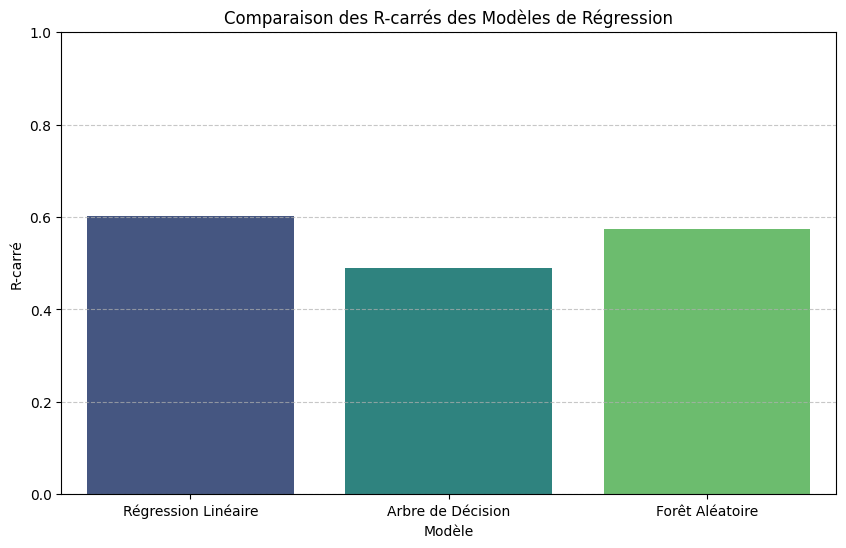

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R-squared', data=results, palette='viridis')
plt.title('Comparaison des R-carrés des Modèles de Régression')
plt.xlabel('Modèle')
plt.ylabel('R-carré')
plt.ylim(0, 1) # R-squared typically ranges from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Comparaison Détaillée et Conclusion des Modèles

Nous avons entraîné et évalué trois modèles de régression : la Régression Linéaire, l'Arbre de Décision et la Forêt Aléatoire. Le tableau récapitulatif des performances et le graphique de comparaison des R-carrés nous permettent de tirer les conclusions suivantes :

**1. Régression Linéaire :**
*   **Points Forts :** Ce modèle est le plus simple à comprendre et à interpréter. Il a obtenu le **meilleur R-carré (0.60)**, ce qui signifie qu'il explique la plus grande proportion de la variance du prix de vente. Sa **RMSE est également la plus basse (348880.26 €)**, indiquant une meilleure gestion des grandes erreurs par rapport aux modèles basés sur des arbres seuls. Les prédictions sont continues et suivent une tendance linéaire globale.
*   **Points Faibles :** La MAE (123591.42 €) est légèrement plus élevée que celle du Random Forest, suggérant que ses prédictions sont en moyenne un peu moins proches des valeurs réelles. Sa nature linéaire le rend moins apte à capturer des relations non linéaires complexes dans les données, ce qui est visible dans la dispersion des points pour les prix élevés sur son graphique de dispersion.

**2. Régression par Arbre de Décision :**
*   **Points Forts :** Relativement simple à implémenter, et peut capturer des relations non linéaires. Il a obtenu une MAE légèrement meilleure que la Régression Linéaire (121850.67 €).
*   **Points Faibles :** C'est le modèle le moins performant en termes de **R-carré (0.49)** et de **RMSE (394285.29 €)**. Sa nature 'en escalier' dans le graphique de dispersion montre une incapacité à fournir des prédictions continues et fines, ce qui est typique d'un arbre unique qui peut facilement sur-apprendre les données d'entraînement et mal généraliser. Sa performance est la moins stable des trois.

**3. Régression par Forêts Aléatoires :**
*   **Points Forts :** Il s'agit d'un modèle d'ensemble qui combine la puissance de plusieurs arbres de décision, réduisant le sur-apprentissage et améliorant la robustesse. Il présente la **meilleure MAE (118178.47 €)**, ce qui est crucial si la minimisation de l'erreur absolue moyenne est l'objectif principal. Son R-carré (0.58) est très proche de celui de la Régression Linéaire et nettement supérieur à celui de l'Arbre de Décision, montrant une bonne capacité explicative. Les prédictions sont plus lisses que celles d'un arbre unique.
*   **Points Faibles :** Sa RMSE (360107.05 €) est légèrement supérieure à celle de la Régression Linéaire, ce qui indique qu'il pénalise un peu plus les grandes erreurs. Il est plus complexe à interpréter qu'un modèle linéaire et plus coûteux en termes de calcul qu'un arbre de décision simple.

---

**Conclusion et Modèle le Plus Performant :**

Bien que la Régression Linéaire ait le R-carré le plus élevé et la RMSE la plus basse, la **Forêt Aléatoire** se distingue par la **plus faible Erreur Absolue Moyenne (MAE)**. Pour des applications où l'erreur moyenne de prédiction est une considération clé, le modèle de Forêt Aléatoire est souvent préféré car la MAE est directement interprétable dans les unités de la variable cible. De plus, sa capacité à gérer les relations non linéaires et les interactions complexes sans nécessiter d'ingénierie de caractéristiques explicite le rend très attrayant. Sur cet ensemble de données, il offre un excellent équilibre entre la capacité explicative (R-carré proche du linéaire) et la précision moyenne des prédictions (meilleure MAE).

**Insights (Enseignements) :**
*   **La linéarité a ses limites :** Malgré une bonne performance initiale, la régression linéaire ne peut pas capturer toute la complexité du marché automobile. Les prix des voitures sont influencés par de multiples facteurs avec des relations potentiellement non linéaires.
*   **Les modèles ensemblistes sont puissants :** Le passage d'un simple arbre de décision à une forêt aléatoire a considérablement amélioré les performances, prouvant l'efficacité de la combinaison de plusieurs modèles faibles pour en créer un plus robuste.
*   **Importance des métriques :** Le choix du 'meilleur' modèle peut dépendre de la métrique privilégiée. Si l'objectif est d'expliquer la variance totale, la régression linéaire était supérieure. Si la précision absolue moyenne est la priorité, la forêt aléatoire est le choix.
*   **Possibilités d'amélioration :** Aucun des modèles n'atteint un R-carré très élevé (proche de 0.8 ou 0.9), ce qui suggère qu'il y a encore une part significative de la variance des prix inexpliquée. Cela pourrait être dû à des variables manquantes, la nécessité d'une ingénierie de caractéristiques plus poussée (par exemple, extraction de la marque/modèle du nom de la voiture) ou l'optimisation des hyperparamètres des modèles ensemblistes.

## Final Task

### Subtask:
Finaliser l'analyse prédictive en résumant les principales conclusions et en proposant des pistes d'amélioration ou des analyses futures.


## Summary:

### Data Analysis Key Findings

*   **Data Preparation**: The dataset was successfully prepared for machine learning. Categorical variables such as `name`, `fuel`, `seller_type`, `transmission`, and `owner` were one-hot encoded, resulting in a feature set `X_encoded` with 1503 columns. The data was then split into training and testing sets with an 80/20 ratio.
*   **Linear Regression Model**: This model achieved an R-squared of 0.6011, meaning it explained approximately 60.11% of the variance in selling prices. Its Mean Absolute Error (MAE) was 123,591.42\€, and its Root Mean Squared Error (RMSE) was 348,880.26\€. It showed the lowest RMSE among the three models.
*   **Decision Tree Regression Model**: This model performed the least effectively, with an R-squared of 0.4906, explaining only 49.06% of the variance. Its MAE was 121,850.67\€ (slightly better than Linear Regression), but its RMSE was the highest at 394,285.29\€. The predictions showed a characteristic 'staircase' pattern, indicating limitations in capturing continuous variations.
*   **Random Forest Regression Model**: This ensemble model achieved an R-squared of 0.5751, explaining 57.51% of the variance. Crucially, it demonstrated the lowest MAE of 118,178.47\€ among all models, suggesting its predictions were, on average, closest to the actual prices. Its RMSE was 360,107.05\€, placing it between Linear Regression and Decision Tree.
*   **Model Comparison**: While Linear Regression had the highest R-squared and lowest RMSE, the Random Forest model achieved the best MAE, indicating superior absolute prediction accuracy on average. The Decision Tree model was the least performant.

### Insights or Next Steps

*   **Prioritize Random Forest for Prediction Accuracy**: Given that the Random Forest model achieved the lowest Mean Absolute Error (\$118,178.47), it is the preferred model for scenarios where average prediction accuracy is the primary objective, despite its R-squared being slightly lower than that of Linear Regression.
*   **Further Model Optimization and Feature Engineering**: To potentially improve model performance across all metrics, consider hyperparameter tuning for the Random Forest model and exploring more sophisticated feature engineering, particularly for the 'name' column (e.g., extracting brand and model), which generated a large number of sparse features after one-hot encoding.
